# 1. Introduction to Data Science in Python
![HKU SAAS logo](https://res.cloudinary.com/springboard-images/image/upload/q_auto,f_auto,fl_lossy/wordpress/2016/11/1462223977_data_science_venn-1.png)

This notebook helps introduce some of the most basic tools that are commonly used for doing data science and statistics in Python.

# Table of contents
* [Introduction](#introduction)
* [Jupyter Notebook](#Jupyter-Notebook)
* [pandas](#pandas)
* [NumPy](#Introduction-to-NumPy)
* [Interactive data visualization with Plotly](#plotly)
* [Linear regression with Scikit-learn and statsmodels](#Linear-regression-with-scikit-learn-and-statsmodels)
* [Additional references](#additional-references)

## Note: you will need to run the following code cell every time you restart this notebook
If this is your first time using Jupyter, click the block of code below and either press the <i class="fa-step-forward fa"></i><span class="toolbar-btn-label">Run</span></div> button or press `Shift + Enter` on your keyboard.

In [1]:
import pandas               as pd
import matplotlib.pyplot    as plt
import numpy                as np
import statsmodels.api      as sm
import seaborn              as sns
import plotly.offline       as py
import plotly.graph_objs    as go
from   sklearn.linear_model import LinearRegression

from IPython.display import display

iris = sns.load_dataset('iris')

# Allow plotly to display plots inside the notebook
py.init_notebook_mode(connected=True)

/Users/l-c/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ModuleNotFoundError: No module named 'plotly'

# Jupyter Notebook <a id="Jupyter-Notebook"></a>
[Jupyter Notebook](https://jupyter.org/) is an interactive tool for running code and visualizing data. Each notebook consists of a series of _code cells_ and _Markdown cells_.

* Code cells allow you to run code in a number of languages. Behind the scenes, Jupyter runs a "kernel" that processes the code whenever you execute a cell. Since this is a Python notebook, Jupyter is running the [IPython](https://ipython.org/) kernel. However, kernels also exist for Julia, R, and many other languages.
* Markdown cells display text using the [Markdown language](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html). In addition to displaying text, you can write equations in these cells using $\LaTeX$.

To run code, click a code cell (like the one below) and do one of the following:
* Press `Shift + Enter` on your keyboard
* On the toolbar at the top of this notebook, press the <i class="fa-step-forward fa"></i><span class="toolbar-btn-label">Run</span> button.

In [ ]:
print("Hello, world!")

You can render a markdown cell in the same way. Double click the text below, and try putting in some of the following items:

    # This is a large heading!
    ## This is a smaller heading!
    ### This is an even smaller heading!
    Here is some code: `x = y + z`
    And here is an equation: $x = y + z$



## *Double-click this text!*



### Cell magic
The IPython kernel provides some useful tools for programmers, including

* [Magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html), which allow you to do things like look up documentation and past commands that you've run, and
* [Building graphical user interfaces (GUIs)](https://ipython.org/ipython-doc/stable/interactive/reference.html#gui-event-loop-support) to make it easier to interact with your code.

Here's an example of a useful magic command. `?` will look up the documentation for a library, class, or function to help you figure out how to use it. For instance, if I want to learn about [pandas DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), I can run the following:

In [2]:
?pd.DataFrame

If you want to see all the magic functions that IPython makes available to you, `%quickref` can give you a high-level overview.

In [ ]:
%quickref

### Widgets
IPython and Jupyter Notebook also makes it easy to build [widgets](https://ipywidgets.readthedocs.io/en/latest/index.html), which give you a richer interface with which to interact with the notebook. Try running the code cell below. This code creates two plots, and displays them in adjacent tabs.

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import norm, linregress

out = [widgets.Output(), widgets.Output()]
tabs = widgets.Tab(children=[out[0], out[1]])
tabs.set_title(0, 'Linear regression')
tabs.set_title(1, 'Normal distribution')

with out[0]:
    # Fit line to some random data
    x = np.random.uniform(size=30)
    y = x + np.random.normal(scale=0.1, size=30)
    slope, intercept, _, _, _ = linregress(x,y)
    u = np.linspace(0, 1)
    
    # Plot
    fig1, axes1 = plt.subplots()
    axes1.scatter(x, y)
    axes1.plot(u, slope * u + intercept, 'k')
    plt.show(fig1)

with out[1]:
    # Plot the probability distribution function (pdf) of the
    # standard normal distribution.
    x = np.linspace(-3.5, 3.5, num=100)
    p = norm.pdf(x)
    
    # Plot
    fig2, axes2 = plt.subplots()
    axes2.plot(x, p)
    plt.show(fig2)

display(tabs)

A Jupyter Widget

You can create much richer and more complex interfaces that include buttons, sliders, progress bars, and more with Jupyter's ipywidgets library ([docs](https://ipywidgets.readthedocs.io/en/latest/index.html)).

# pandas <a id="pandas"></a>
[pandas](https://pandas.pydata.org/) is a Python library that provides useful data structures and tools for analyzing data.

The fundamental type of the pandas library is the `DataFrame`. In the following code, we load the [iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) using the [seaborn library](https://seaborn.pydata.org/). By default, this dataset is stored in a pandas `DataFrame`.

In [4]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')

# `iris` is stored as a pandas DataFrame
print('Type of "iris":', type(iris))

# Show the first few entries in this DataFrame
iris.head()

Type of "iris": <class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's get some information about the iris dataset. Let's try to do the following:

1. Find out how many columns there are in the `DataFrame` object, and what kinds of data are in each column
2. Calculate the average petal length
3. Determine what species of flowers are in the dataset
4. Get an overall summary of the dataset

In [5]:
# 1. Column labels, and types of data in each column
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
# 2. Calculate the average petal length
iris['petal_length'].mean()

3.7580000000000027

In [7]:
# 3. Determine which iris species are in the dataset
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
# 4. Summary of the data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Sometimes we need to extract certain rows or columns of a DataFrame. For instance, in the following code we store each species of flower in its own variable:

In [9]:
"""
IPython.display is a convenience function that works in Jupyter Notebook
(or, more generally, any IPython-based application) that will show
objects in a nicer way than using print(). We'll use it in this notebook
to show some pandas DataFrames.
"""
from IPython.display import display

"""
Create a DataFrame for each species of flower. I've provided two
methods for creating these DataFrames below; pick whichever you
prefer as they are equivalent.
"""
# Method 1: "query" function
setosa     = iris.query('species == "setosa"')
versicolor = iris.query('species == "versicolor"')

# Method 2: index into the DataFrame
virginica = iris[iris['species'] == 'virginica']

"""
Show the first few entries of the DataFrame corresponding to each species
"""
print('Setosa data:')
display(setosa.head())

print('Versicolor data:')
display(versicolor.head())

print('Virginica data:')
display(virginica.head())

Setosa data:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Versicolor data:


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


Virginica data:


,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


To extract a column, we can either use `iris[column_name]` or `iris.iloc[:,column_index]`.

In [10]:
"""
Get the first column.

Note: whenever we extract a single column of a pandas DataFrame,
we get back a pandas Series object. To turn it back into a DataFrame,
we add the line `first_column = pd.DataFrame(first_column)`.
"""
first_column = iris.iloc[:,0]
first_column = pd.DataFrame(first_column)

print('First column:')
display(first_column.head())

"""
Get the first through third columns
"""
first_through_third_columns = iris.iloc[:,0:3]

print('First through third columns:')
display(first_through_third_columns.head())

"""
Get the 'species' column.
"""
species = iris['species']
species = pd.DataFrame(species)

print('Species column:')
display(species.head())

"""
Get all columns *except* the species column
"""
all_but_species = iris.iloc[:, iris.columns != 'species']

print("All columns *except* species:")
display(all_but_species.head())

First column:


,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


First through third columns:


,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


Species column:


,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


All columns *except* species:


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


If you want to create your own pandas `DataFrame`, you have to specify the names of the columns and the items in the rows of the `DataFrame`.

In [11]:
column_labels = ['A', 'B']

column_entries = [
    [1, 2],
    [4, 5],
    [7, 8]
]

pd.DataFrame(column_entries, columns=column_labels)

,A,B
0,1,2
1,4,5
2,7,8


## Introduction to NumPy
[NumPy](https://www.numpy.org/) is another Python package providing useful data structures and mathematical functions. NumPy's fundamental data type is the array, `numpy.ndarray`, which is like a stripped-down version of a pandas `DataFrame`. However, the `numpy.ndarray` supports much faster operations, which makes it a lot more practical for scientific computing than, say, Python's list objects.

In [12]:
import numpy as np

# 1. Create an array with the numbers [1, 2, 3]
x = np.array([1, 2, 3])

# 2. Create a 2 x 2 matrix with [1, 2] in the first row and [3, 4]
#    in the second row.
x = np.array( [[1,2], [3,4]] )

# 3. Create an array with the numbers 0, 1, ... , 9. Equivalent to
#    calling np.array(range(10))
x = np.arange(10)

# 4. Create a 2 x 2 matrix with zeros in all entries
x = np.zeros( (2,2) )

# 5. Get the total number of items in the matrix, and the shape of
#    the matrix.
num_items    = x.size
matrix_shape = x.shape

Besides just providing data structures, though, NumPy provides many mathematical utilities as well.

In [13]:
### Constants: pi
print('π      = %f' % np.pi)
print()

### Simple functions: sine, cosine, e^x, log, ...
print('sin(0) = %f' % np.sin(0))
print('cos(0) = %f' % np.cos(0))
print('e^1    = %f' % np.exp(1))
print('ln(1)  = %f' % np.log(1))
print()

### Minimums, maximums, sums...
x = np.array([1,2,3])
print('Min of [1,2,3] = %d' % x.min())
print('Max of [1,2,3] = %d' % x.max())
print('Sum of [1,2,3] = %d' % x.sum())
print()

### Random numbers: uniform distribution, normal distribution, ...
print('Random numbers:')
print('Uniform([0,1]): %f' % np.random.uniform(0,1))
print('Normal(0,1):    %f' % np.random.normal(loc=0, scale=1))
print('Poisson(1):     %f' % np.random.poisson(1))

π      = 3.141593

sin(0) = 0.000000
cos(0) = 1.000000
e^1    = 2.718282
ln(1)  = 0.000000

Min of [1,2,3] = 1
Max of [1,2,3] = 3
Sum of [1,2,3] = 6

Random numbers:
Uniform([0,1]): 0.644897
Normal(0,1):    -0.378736
Poisson(1):     1.000000


NumPy is primarily used to do large-scale operations on arrays of numbers. Because it has C code running behind the scenes, it can do these computations extremely quickly -- much faster than you could do with regular Python code. Among other things, with NumPy you can

* add a number to every element of an array;
* multiply every element of an array by a number;
* add or multiply two arrays together; or
* calculate a matrix-vector or matrix-matrix product between arrays.

In [14]:
x = np.array([1,2,3])
y = np.array([4,5,6])

print('1 + [1,2,3] =', 1 + x)
print('3 * [1,2,3] =', 3 * x)
print('[1,2,3] * [4,5,6] =', x * y)
print('[1,2,3] + [4,5,6] =', x + y)
print('Dot product of [1,2,3] and [4,5,6] =', x.dot(y))

1 + [1,2,3] = [2 3 4]
3 * [1,2,3] = [3 6 9]
[1,2,3] * [4,5,6] = [ 4 10 18]
[1,2,3] + [4,5,6] = [5 7 9]
Dot product of [1,2,3] and [4,5,6] = 32


# Linear regression with scikit-learn and statsmodels
In the last section of the notebook, we're going to use linear regression to try and predict the petal length of each iris from its sepal length, sepal width, and petal width.

Before we even start using linear regression, let's look at how each of these variables are related to one another. Below we plot each pair of variables against the others, with the color of the points reflecting which species we're looking at. On the diagonal are box-and-whisker plots that tell us a little about how each of the variables is distributed.

/Users/l-c/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


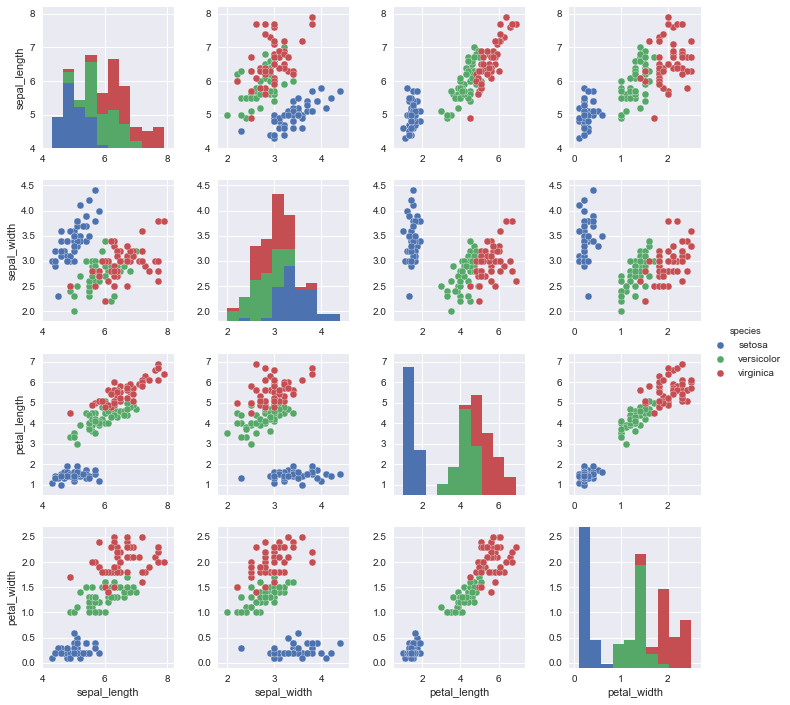

In [18]:
import seaborn as sns
sns.set()
sns.pairplot(iris, hue="species")

The most important conclusion we can draw from these plots is that each pair of variables is roughly linearly related. As a result, we can expect that we should be able to accurately predict petal length from the other three variables using linear regression.

If you just want to do a basic regression and get the coefficients for each variable, you can use `LinearRegression` from the scikit-learn library:

In [19]:
from sklearn.linear_model import LinearRegression

"""
Get all of the irises of the species "setosa" and place them in
a pandas DataFrame called `data`.

Also try with 'setosa' replaced by 'versicolor' and 'virginica'
"""
data = iris[iris['species'] == 'setosa']
    
"""
Split the data into two pieces: the independent variables
(sepal_length, sepal_width, and petal_width), and the dependent
variable (petal_length).
"""
x = data[['sepal_length','sepal_width','petal_width']]
y = data['petal_length']

"""
Create a scikit-learn LinearRegression object which we will
fit to the data.
"""
lm = LinearRegression()
lm.fit(x,y)

for (coef,col) in zip(lm.coef_, x.columns):
    print("%-30s %+.3f" % ("Coefficient for " + col + ":", coef))

Coefficient for sepal_length:  +0.116
Coefficient for sepal_width:   -0.029
Coefficient for petal_width:   +0.463


However, when we run a linear regression we also want to find out other things about our linear model. For instance, we might want to get a confidence interval for each coefficient in the model. The [StatsModels library](https://www.statsmodels.org/stable/index.html) gives us this functionality with `statsmodel.api.sm`:

In [20]:
import statsmodels.api as sm

# Also try with 'setosa' replaced by 'versicolor' and 'virginica'
data = iris[iris['species'] == 'setosa']

x = data[['sepal_length','sepal_width','petal_width']]
y = data['petal_length']
    
"""
Add y-intercept term to our linear model
"""
x = sm.add_constant(x)
    
"""
Perform linear regression
"""
lm      = sm.OLS(y,x)
results = lm.fit()

"""
Print the results
"""
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.598
Date:                Thu, 07 Nov 2019   Prob (F-statistic):             0.0636
Time:                        16:10:58   Log-Likelihood:                 21.003
No. Observations:                  50   AIC:                            -34.01
Df Residuals:                      46   BIC:                            -26.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8655      0.343      2.521   

You can also use R-style formulas to specify what variables you want to use to perform linear regression. 

In [21]:
import statsmodels.formula.api as smf

df = iris[iris['species'] == 'setosa']

# Predict petal length from sepal_width, sepal_length, and petal_width
model = smf.ols(formula='petal_length ~ sepal_width + sepal_length + petal_width',
                data=df)
results = model.fit()

print("Results (petal_length ~ sepal_width + sepal_length + petal_width)")
print(results.summary())
print('-' * 80)

# Predict petal length from just sepal_length and petal_width
model = smf.ols(formula='petal_length ~ sepal_length + petal_width',
                data=df)
results = model.fit()

print("Results (petal_length ~ sepal_length + petal_width)")
print(results.summary())

Results (petal_length ~ sepal_width + sepal_length + petal_width)
                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.598
Date:                Thu, 07 Nov 2019   Prob (F-statistic):             0.0636
Time:                        16:11:00   Log-Likelihood:                 21.003
No. Observations:                  50   AIC:                            -34.01
Df Residuals:                      46   BIC:                            -26.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

## Additional References <a id="additional-references"></a>

* O'Reilly provides a couple of good books that go in-depth about these tools and more:
  * [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do)
  * [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) -- this book was published in 2012 and may be slightly dated. However, the author provides some Jupyter Notebooks for free in [this repository](https://github.com/wesm/pydata-book) that you may find helpful.
* Check out the full documentation for Jupyter on the [Project Jupyter site](https://jupyter.org/documentation).
* Plotting tools:
  * Plotly
    * [Documentation](https://plot.ly/python/reference/)
    * [Examples](https://plot.ly/python/)
  * Matplotlib
    * [Documentation](https://matplotlib.org/contents.html)
    * [Tutorials](https://matplotlib.org/tutorials/index.html)
  * Seaborn
    * [Documentation](https://seaborn.pydata.org/api.html)
    * [Introduction](https://seaborn.pydata.org/introduction.html)
* [Statsmodels documentation](https://www.statsmodels.org/stable/index.html)